In [1]:
import pandas as pd
import numpy as np

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_songs = pd.read_csv('./data/spotify_songs_analysis.csv')

In [3]:
df_songs.shape

(183204, 31)

In [4]:
df_songs.head()

,user_id,song_id,play_count,song_title,artist_id,artist_name,song_prefix,spotify_id,audio_feature,acousticness,...,tempo,time_signature,track_href,type,uri,valence,release,artist_familiarity,artist_hotttnesss,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,ARC8CQZ1187B98DECA,Jack Johnson,AK,spotify:track:4nuY11Vo1Yd5xMHhLfDKe9,[{u'track_href': u'https://api.spotify.com/v1/...,0.656000,...,123.685,4.0,https://api.spotify.com/v1/tracks/4nuY11Vo1Yd5...,audio_features,spotify:track:4nuY11Vo1Yd5xMHhLfDKe9,0.387,Thicker Than Water,0.832012,0.677482,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,Riot Radio (Soundtrack Version),ARI4V0E1187B9B6FC2,The Dead 60s,BF,spotify:track:2HPwuvT6HKngPSynOCi6Lb,[{u'track_href': u'https://api.spotify.com/v1/...,0.000111,...,143.948,4.0,https://api.spotify.com/v1/tracks/2HPwuvT6HKng...,audio_features,spotify:track:2HPwuvT6HKngPSynOCi6Lb,0.839,Nick & Norah's Infinite Playlist - Original Mo...,0.650281,0.451749,0
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1,Ears To The Ground (Album Version),ARMS97V1187B99DD98,Josh Rouse,BV,spotify:track:5WjXULJvSlMxuies9diz1Q,[{u'track_href': u'https://api.spotify.com/v1/...,0.172000,...,123.195,4.0,https://api.spotify.com/v1/tracks/5WjXULJvSlMx...,audio_features,spotify:track:5WjXULJvSlMxuies9diz1Q,0.417,Under Cold Blue Stars,0.675339,0.499641,2002
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXALG12A8C13C108,1,Food Chain (Album Version),ARG3I891187FB3A391,Eric Hutchinson,BX,spotify:track:1bqi9YEdZweX9H6JuSQ6Qw,[{u'track_href': u'https://api.spotify.com/v1/...,0.410000,...,112.492,4.0,https://api.spotify.com/v1/tracks/1bqi9YEdZweX...,audio_features,spotify:track:1bqi9YEdZweX9H6JuSQ6Qw,0.601,Sounds Like This,0.806208,0.498077,2008
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,AR6XPWV1187B9ADAEB,Foo Fighters,DA,spotify:track:4tjBDR8r3kxBXxQPeRTQgu,[{u'track_href': u'https://api.spotify.com/v1/...,0.000016,...,135.994,4.0,https://api.spotify.com/v1/tracks/4tjBDR8r3kxB...,audio_features,spotify:track:4tjBDR8r3kxBXxQPeRTQgu,0.505,There Is Nothing Left To Lose,0.839275,0.550762,1999


In [5]:
df_songs.columns

Index([u'user_id', u'song_id', u'play_count', u'song_title', u'artist_id',
       u'artist_name', u'song_prefix', u'spotify_id', u'audio_feature',
       u'acousticness', u'analysis_url', u'danceability', u'duration_ms',
       u'energy', u'id', u'instrumentalness', u'key', u'liveness', u'loudness',
       u'mode', u'speechiness', u'tempo', u'time_signature', u'track_href',
       u'type', u'uri', u'valence', u'release', u'artist_familiarity',
       u'artist_hotttnesss', u'year'],
      dtype='object')

In [93]:
len(df_songs[df_songs.year==0]), len(df_songs)

(56719, 183204)

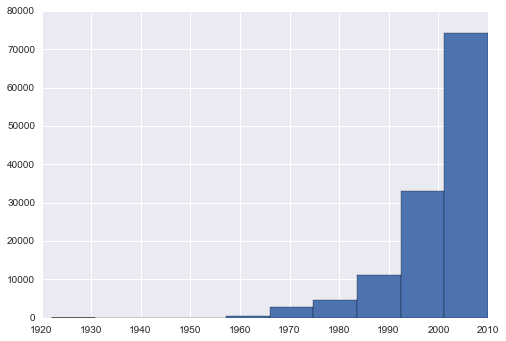

In [94]:
df_songs[df_songs.year!=0].year.hist()

### Music development temporal analysis

In [123]:
features = ['acousticness','danceability','key','mode','energy','instrumentalness','liveness', \
                'loudness','speechiness','tempo','time_signature','valence','artist_familiarity', \
                'artist_hotttnesss']

In [122]:
df_songs_year = df_songs[df_songs.year!=0]

In [131]:
num_songs_by_year = df_songs_year.groupby('year').count()

In [128]:
music_by_year = df_songs_year.groupby('year')[features].mean()

In [130]:
music_by_year.head()

,acousticness,danceability,key,mode,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,artist_familiarity,artist_hotttnesss
year,,,,,,,,,,,,,,
1922,0.0129,0.735,11.0,0.0,0.4520,0.00000,0.0636,-9.500,0.0438,71.624,4.0,0.835,0.669587,0.414859
1925,0.9950,0.474,0.0,1.0,0.1580,0.03180,0.2990,-13.463,0.0454,100.918,4.0,0.408,0.471549,0.296682
1926,0.9920,0.534,0.0,0.0,0.1050,0.80100,0.1510,-22.998,0.2190,200.999,4.0,0.577,0.333935,0.348601
1927,0.9940,0.637,5.0,0.0,0.1760,0.00131,0.1440,-12.515,0.0460,115.922,4.0,0.744,0.436236,0.324538
1928,0.9815,0.602,0.0,1.0,0.1121,0.00605,0.0872,-15.435,0.0563,144.633,4.0,0.480,0.532515,0.377808


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

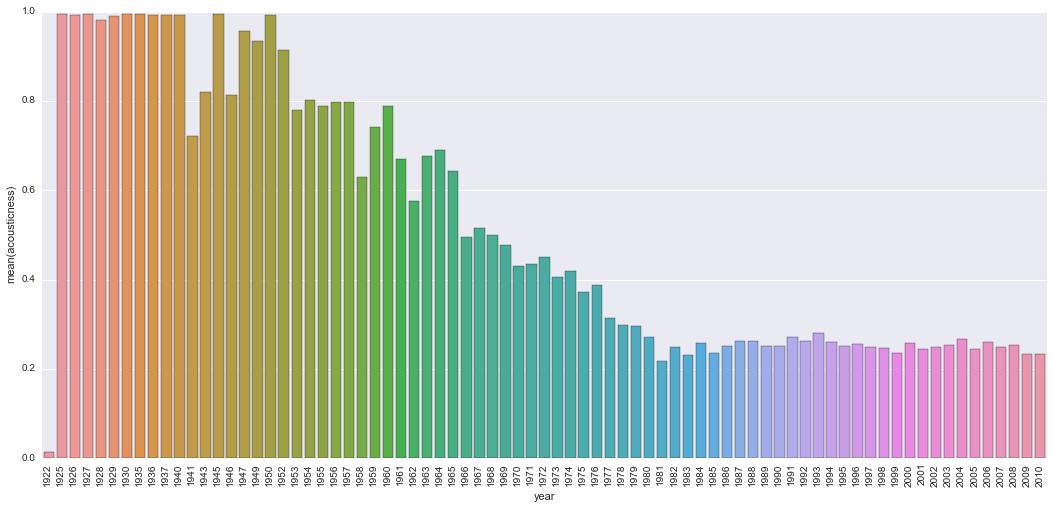

In [135]:
plt.rcParams['figure.figsize'] = (18, 8)
ax = sns.barplot(music_by_year.index, music_by_year.acousticness)
plt.xticks(rotation=90)

(array([ 1920.,  1930.,  1940.,  1950.,  1960.,  1970.,  1980.,  1990.,
         2000.,  2010.]), <a list of 10 Text xticklabel objects>)

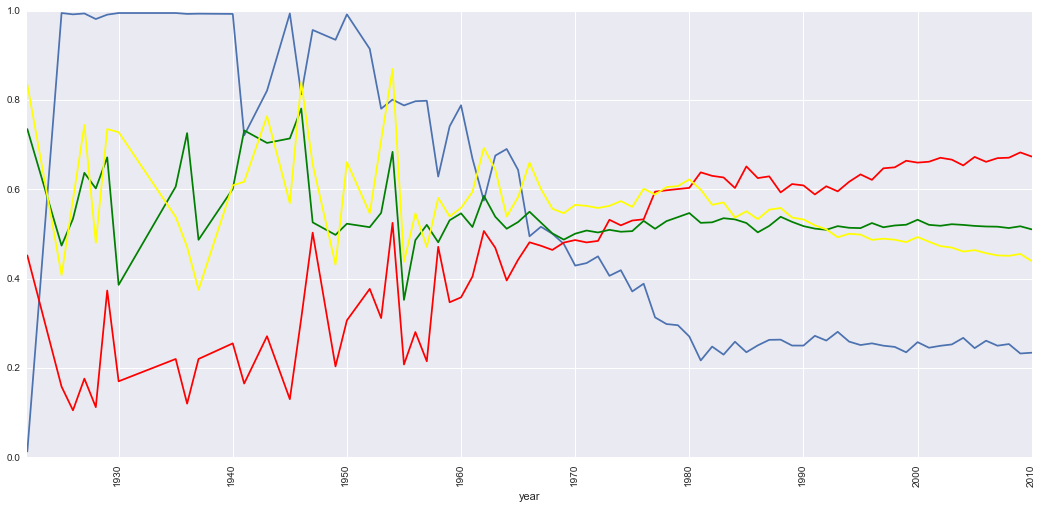

In [141]:
plt.rcParams['figure.figsize'] = (18, 8)
ax = sns.tsplot(music_by_year.acousticness, time=music_by_year.index)
ax = sns.tsplot(music_by_year.energy, time=music_by_year.index, color='red')
ax = sns.tsplot(music_by_year.danceability, time=music_by_year.index, color='green')
ax = sns.tsplot(music_by_year.valence, time=music_by_year.index, color='yellow')
plt.xticks(rotation=90)

In [6]:
num_features = ['acousticness','danceability','duration_ms','energy','instrumentalness','liveness', \
                'loudness','speechiness','tempo','time_signature','valence','artist_familiarity', \
                'artist_hotttnesss']
cat_features = ['key','mode','year']

In [7]:
print df_songs[num_features].describe()

        acousticness   danceability   duration_ms         energy  \
count  183203.000000  183161.000000  1.832040e+05  183203.000000   
mean        0.277152       0.526918  2.401994e+05       0.638811   
std         0.322849       0.176007  1.004854e+05       0.254961   
min         0.000000       0.055500  4.037000e+03       0.000020   
25%         0.006950       0.403000  1.844930e+05       0.455000   
50%         0.112000       0.533000  2.283070e+05       0.680000   
75%         0.519000       0.656000  2.784000e+05       0.860000   
max         0.996000       0.997000  3.035280e+06       1.000000   

       instrumentalness       liveness       loudness    speechiness  \
count     183203.000000  183202.000000  183204.000000  183161.000000   
mean           0.186597       0.215107      -9.047922       0.084492   
std            0.318713       0.191067       4.709803       0.111716   
min            0.000000       0.008580     -54.909000       0.021900   
25%            0.000002    

### K-Means clustering

In [43]:
from sklearn.cluster import KMeans

In [44]:
from sklearn.metrics import silhouette_score

In [45]:
X = df_songs[num_features].fillna(0.)

In [46]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

In [47]:
X.shape, kmeans.labels_.shape

((183204, 13), (183204,))

In [48]:
#cluster_labels = kmeans.labels_

#silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean')
#print("For n_clusters =", 3,
#        "The average silhouette_score is :", silhouette_avg)

In [49]:
np.bincount(kmeans.labels_)

array([45875,  6419, 28823, 14211,    60,   379, 46120, 29101, 10443,  1773])

In [53]:
kmeans.cluster_centers_.shape

(10, 13)

In [56]:
len(X[kmeans.labels_==0])

45875

In [51]:
from sklearn.metrics.pairwise import pairwise_distances

In [58]:
def compute_heterogeneity(data, k, centroids, cluster_assignment):
    
    heterogeneity = 0.0
    for i in xrange(k):
        
        # Select all data points that belong to cluster i. Fill in the blank (RHS only)
        member_data_points = data[cluster_assignment==i]
        
        if member_data_points.shape[0] > 0: # check if i-th cluster is non-empty
            # Compute distances from centroid to data points (RHS only)
            distances = pairwise_distances(member_data_points, [centroids[i]], metric='euclidean')
            squared_distances = distances**2
            heterogeneity += np.sum(squared_distances)
        
    return heterogeneity

In [59]:
compute_heterogeneity(X, 10, kmeans.cluster_centers_, kmeans.labels_)

77275636582827.812

In [63]:
def plot_k_vs_heterogeneity(k_values, heterogeneity_values):
    plt.figure(figsize=(7,4))
    plt.plot(k_values, heterogeneity_values, linewidth=4)
    plt.xlabel('K')
    plt.ylabel('Heterogeneity')
    plt.title('K vs. Heterogeneity')
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [61]:
k_list = range(3,21)
het_score_list = []
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    het_score = compute_heterogeneity(X, k, kmeans.cluster_centers_, kmeans.labels_)
    het_score_list.append(het_score)
    print k, het_score

3 5.6124338454e+14
4 3.80190156657e+14
5 2.59313288766e+14
6 1.90838672706e+14
7 1.45387504671e+14
8 1.13929348797e+14
9 9.29091166395e+13
10 7.72756365828e+13
11 6.41232837362e+13
12 5.39818625228e+13
13 4.68623175741e+13
14 4.0355058565e+13
15 3.53568112228e+13
16 3.12756632001e+13
17 2.77539580236e+13
18 2.46368219734e+13
19 2.21787112735e+13
20 2.00932537433e+13


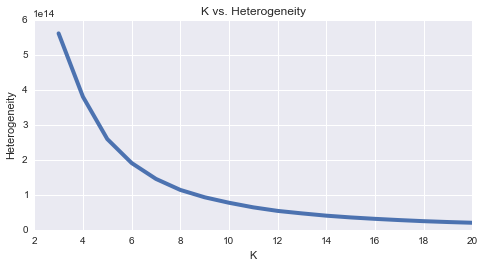

In [64]:
plot_k_vs_heterogeneity(k_list, het_score_list)

In [65]:
k_list = range(3,100,3)
het_score_list = []
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    het_score = compute_heterogeneity(X, k, kmeans.cluster_centers_, kmeans.labels_)
    het_score_list.append(het_score)
    print k, het_score

3 5.6124338454e+14
6 1.90838672706e+14
9 9.29091166395e+13
12 5.39818625228e+13
15 3.53568112228e+13
18 2.46368219734e+13
21 1.82576549247e+13
24 1.40431409156e+13
27 1.12382193206e+13
30 9.17753840063e+12
33 7.52070693364e+12
36 6.29443807872e+12
39 5.3490465181e+12
42 4.59564963848e+12
45 4.0219347489e+12
48 3.52540912926e+12
51 3.12474530255e+12
54 2.81909949244e+12
57 2.5217166476e+12
60 2.27482271496e+12
63 2.03855602007e+12
66 1.83268923991e+12
69 1.68320205987e+12
72 1.55194009441e+12
75 1.41510589227e+12
78 1.30043126166e+12
81 1.21716785888e+12
84 1.12054851868e+12
87 1.04632876418e+12
90 976226489596.0
93 922000194220.0
96 864895729791.0
99 809610114803.0


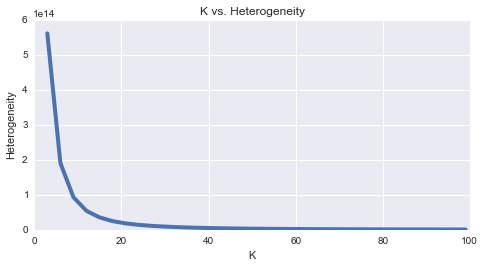

In [66]:
plot_k_vs_heterogeneity(k_list, het_score_list)

In [80]:
# Let's choose k = 8
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [81]:
len(np.bincount(kmeans.labels_))

5

In [82]:
df_songs['kmeans_cluster'] = kmeans.labels_

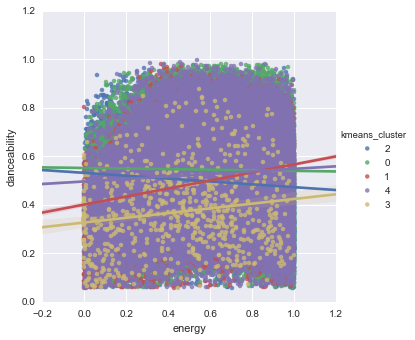

In [83]:
sns.lmplot(x='energy',y='danceability',hue='kmeans_cluster',data=df_songs)

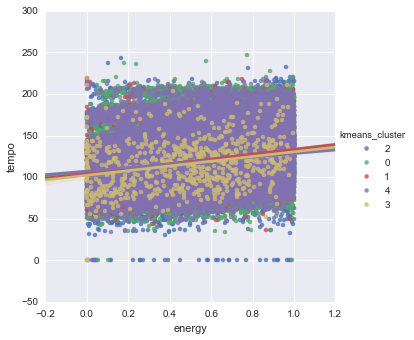

In [84]:
sns.lmplot(x='energy',y='tempo',hue='kmeans_cluster',data=df_songs)

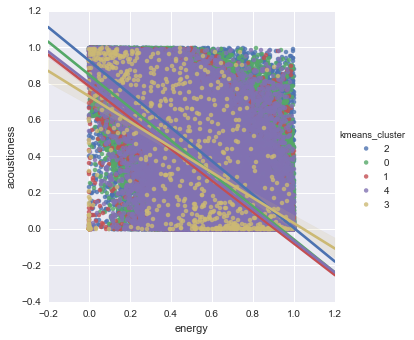

In [85]:
sns.lmplot(x='energy',y='acousticness',hue='kmeans_cluster',data=df_songs)

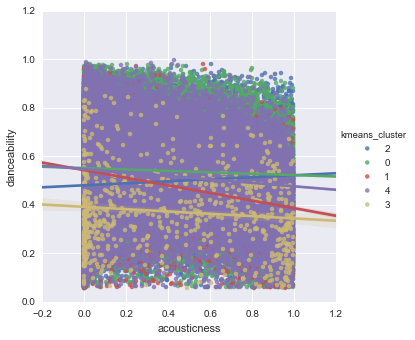

In [86]:
sns.lmplot(x='acousticness',y='danceability',hue='kmeans_cluster',data=df_songs)

In [87]:
X.columns

Index([u'acousticness', u'danceability', u'duration_ms', u'energy',
       u'instrumentalness', u'liveness', u'loudness', u'speechiness', u'tempo',
       u'time_signature', u'valence', u'artist_familiarity',
       u'artist_hotttnesss'],
      dtype='object')

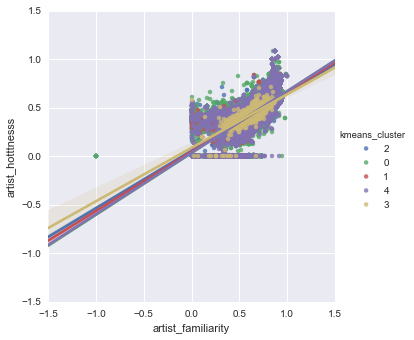

In [88]:
sns.lmplot(x='artist_familiarity',y='artist_hotttnesss',hue='kmeans_cluster',data=df_songs)

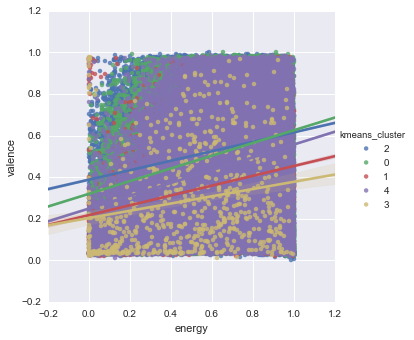

In [89]:
sns.lmplot(x='energy',y='valence',hue='kmeans_cluster',data=df_songs)

### Hierarchical Clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [12]:
# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 30, include_self=False)

In [13]:
knn_graph

<183204x183204 sparse matrix of type '<type 'numpy.float64'>'
	with 5496120 stored elements in Compressed Sparse Row format>

In [14]:
knn_graph[90:100,90:100].toarray()

array([[ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [15]:
h_clustering = AgglomerativeClustering(connectivity=knn_graph,n_clusters=30)

In [16]:
h_cluster = h_clustering.fit_predict(X)

In [17]:
h_clustering.labels_.shape

(183204,)

In [18]:
np.bincount(h_clustering.labels_)

array([ 3926, 22013,  8381,    39,  4672,  1817,  6866,   219, 10227,
        1832, 15173, 17741,    95,  3701,     9, 10684, 14752, 15104,
         598,  8591,   286,  2060,  8863,    75,   492,  5632,  9524,
        7498,     2,  2332])

In [19]:
h_clustering.n_leaves_

183204

In [20]:
h_clustering.n_components_ 

1

In [21]:
h_clustering.children_

array([[    85,     87],
       [    86,     88],
       [    89,     91],
       ..., 
       [366401, 366402],
       [366400, 366403],
       [366404, 366405]])

In [22]:
h_clustering.children_.shape

(183203, 2)

In [23]:
h_clustering.get_params()

{'affinity': 'euclidean',
 'compute_full_tree': 'auto',
 'connectivity': <183204x183204 sparse matrix of type '<type 'numpy.float64'>'
 	with 5496120 stored elements in Compressed Sparse Row format>,
 'linkage': 'ward',
 'memory': Memory(cachedir=None),
 'n_clusters': 30,
 'n_components': None,
 'pooling_func': <function numpy.core.fromnumeric.mean>}

In [24]:
all(h_cluster == h_clustering.labels_)

True

In [25]:
df_songs['h_cluster'] = h_clustering.labels_

In [26]:
len(df_songs[df_songs['h_cluster']==0])

3926

In [27]:
df_songs[df_songs['h_cluster']==0].head()

,user_id,song_id,play_count,song_title,artist_id,artist_name,song_prefix,spotify_id,audio_feature,acousticness,...,time_signature,track_href,type,uri,valence,release,artist_familiarity,artist_hotttnesss,year,h_cluster
59,8937134734f869debcab8f23d77465b4caaa85df,SOEBOAR12A6D4FD136,1,Danger Bird (Album Version),ARWT91C1187B9ACEAA,Neil Young,EB,spotify:track:6csKgSvounUtATjsCvaBAb,[{u'track_href': u'https://api.spotify.com/v1/...,0.064400,...,4.0,https://api.spotify.com/v1/tracks/6csKgSvounUt...,audio_features,spotify:track:6csKgSvounUtATjsCvaBAb,0.1350,Zuma,0.777730,0.577188,0,0
97,b64cdd1a0bd907e5e00b39e345194768e330d652,SOBJIZY12A6701F11A,1,Emotion,ARF8HTQ1187B9AE693,Daft Punk,BJ,spotify:track:0Dezmoeb373GNcYBjLVAMH,[{u'track_href': u'https://api.spotify.com/v1/...,0.000555,...,4.0,https://api.spotify.com/v1/tracks/0Dezmoeb373G...,audio_features,spotify:track:0Dezmoeb373GNcYBjLVAMH,0.0543,Human After All,0.902841,1.021256,2005,0
98,b64cdd1a0bd907e5e00b39e345194768e330d652,SOCGPAT12AC3DF8399,2,Exhale,ARGBB761187B9AEFE9,System F,CG,spotify:track:0iTlGLAhCU7jojPx7zh4ap,[{u'track_href': u'https://api.spotify.com/v1/...,0.000018,...,4.0,https://api.spotify.com/v1/tracks/0iTlGLAhCU7j...,audio_features,spotify:track:0iTlGLAhCU7jojPx7zh4ap,0.6760,Out Of The Blue Remastered,0.620266,0.388497,2000,0
288,5a905f000fc1ff3df7ca807d57edb608863db05d,SOLNMFP12A8C13B616,2,Tonebank Computer,ARFKLA11187FB4C5A3,Holy Fuck,LN,spotify:track:28vdSqTMWRPxXTCiXVw0ax,[{u'track_href': u'https://api.spotify.com/v1/...,0.003520,...,4.0,https://api.spotify.com/v1/tracks/28vdSqTMWRPx...,audio_features,spotify:track:28vdSqTMWRPxXTCiXVw0ax,0.4370,Holy Fuck,0.753299,0.453486,2005,0
303,5a905f000fc1ff3df7ca807d57edb608863db05d,SONEYTB12AF72A73F0,5,Get Innocuous!,ARFIU2R1187B9927F9,LCD Soundsystem,NE,spotify:track:0Ct2XTT4UBt9Y196i0Ido2,[{u'track_href': u'https://api.spotify.com/v1/...,0.010500,...,4.0,https://api.spotify.com/v1/tracks/0Ct2XTT4UBt9...,audio_features,spotify:track:0Ct2XTT4UBt9Y196i0Ido2,0.5870,Sound Of Silver,0.764882,0.614346,2007,0


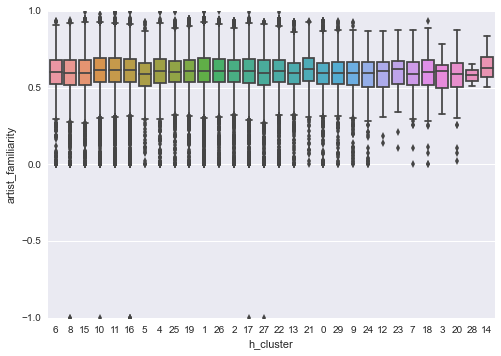

In [30]:
sns.boxplot(y='artist_familiarity',x='h_cluster',data=df_songs)

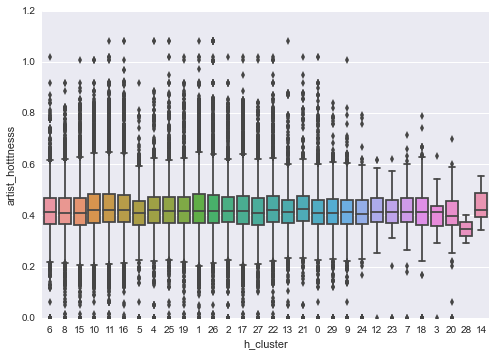

In [31]:
sns.boxplot(y='artist_hotttnesss',x='h_cluster',data=df_songs)

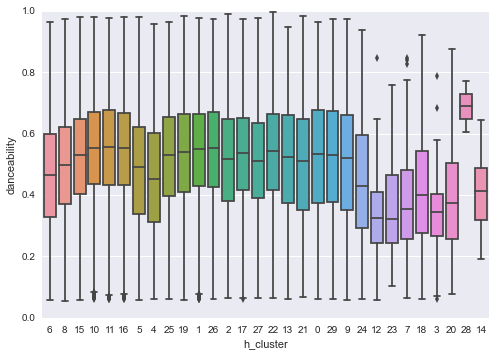

In [35]:
sns.boxplot(y='danceability',x='h_cluster',data=df_songs)

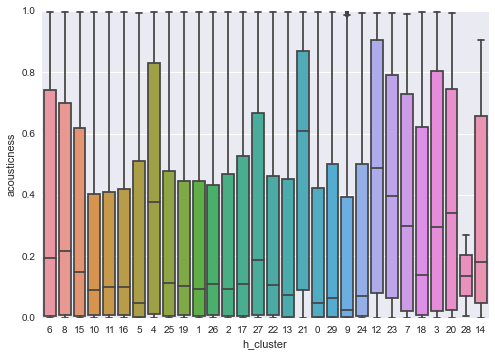

In [36]:
sns.boxplot(y='acousticness',x='h_cluster',data=df_songs)

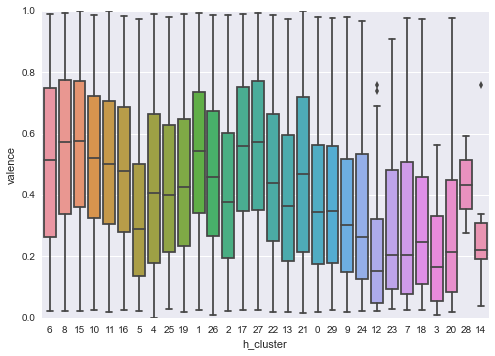

In [37]:
sns.boxplot(y='valence',x='h_cluster',data=df_songs)

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


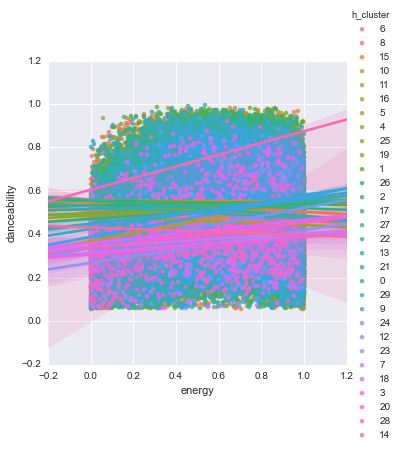

In [39]:
sns.lmplot(x='energy',y='danceability',hue='h_cluster',data=df_songs)

In [32]:
df_songs.ix[97,:]

user_id                        b64cdd1a0bd907e5e00b39e345194768e330d652
song_id                                              SOBJIZY12A6701F11A
play_count                                                            1
song_title                                                      Emotion
artist_id                                            ARF8HTQ1187B9AE693
artist_name                                                   Daft Punk
song_prefix                                                          BJ
spotify_id                         spotify:track:0Dezmoeb373GNcYBjLVAMH
audio_feature         [{u'track_href': u'https://api.spotify.com/v1/...
acousticness                                                   0.000555
analysis_url          https://api.spotify.com/v1/audio-analysis/0Dez...
danceability                                                      0.344
duration_ms                                                      417320
energy                                                          

In [33]:
df_songs.ix[59,:]

user_id                        8937134734f869debcab8f23d77465b4caaa85df
song_id                                              SOEBOAR12A6D4FD136
play_count                                                            1
song_title                                  Danger Bird (Album Version)
artist_id                                            ARWT91C1187B9ACEAA
artist_name                                                  Neil Young
song_prefix                                                          EB
spotify_id                         spotify:track:6csKgSvounUtATjsCvaBAb
audio_feature         [{u'track_href': u'https://api.spotify.com/v1/...
acousticness                                                     0.0644
analysis_url          https://api.spotify.com/v1/audio-analysis/6csK...
danceability                                                      0.339
duration_ms                                                      414707
energy                                                          

In [34]:
df_songs.ix[303,:]

user_id                        5a905f000fc1ff3df7ca807d57edb608863db05d
song_id                                              SONEYTB12AF72A73F0
play_count                                                            5
song_title                                               Get Innocuous!
artist_id                                            ARFIU2R1187B9927F9
artist_name                                             LCD Soundsystem
song_prefix                                                          NE
spotify_id                         spotify:track:0Ct2XTT4UBt9Y196i0Ido2
audio_feature         [{u'track_href': u'https://api.spotify.com/v1/...
acousticness                                                     0.0105
analysis_url          https://api.spotify.com/v1/audio-analysis/0Ct2...
danceability                                                      0.696
duration_ms                                                      431520
energy                                                          

### K-Nearest Neighbors Song similarity

In [96]:
from sklearn.neighbors import NearestNeighbors

In [97]:
neigh = NearestNeighbors(n_neighbors=10)

In [110]:
features = ['acousticness','danceability','key','mode','energy','instrumentalness','liveness', \
                'loudness','speechiness','tempo','time_signature','valence','artist_familiarity', \
                'artist_hotttnesss']

In [113]:
X = df_songs[features].fillna(0.)

In [114]:
neigh.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_neighbors=10, p=2, radius=1.0)

In [115]:
X.ix[0,:]

acousticness            0.656000
danceability            0.486000
key                     7.000000
mode                    1.000000
energy                  0.231000
instrumentalness        0.577000
liveness                0.128000
loudness              -15.423000
speechiness             0.044500
tempo                 123.685000
time_signature          4.000000
valence                 0.387000
artist_familiarity      0.832012
artist_hotttnesss       0.677482
Name: 0, dtype: float64

In [116]:
dist, ind = neigh.kneighbors(X.ix[0,:])

In [117]:
dist

array([[ 0.        ,  0.84831456,  0.90543621,  0.91155355,  0.93985293,
         0.95397329,  0.98308948,  1.01058317,  1.0116421 ,  1.01349645]])

In [118]:
ind

array([[     0,  94496, 113011,  13601,  34285,  16116,   2816, 126400,
         45568,  44413]])

In [119]:
ind[0].tolist()

[0, 94496, 113011, 13601, 34285, 16116, 2816, 126400, 45568, 44413]

In [120]:
X.ix[ind[0].tolist(),:]

,acousticness,danceability,key,mode,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,artist_familiarity,artist_hotttnesss
0,0.65600,0.486,7.0,1.0,0.231,0.577000,0.1280,-15.423,0.0445,123.685,4.0,0.387,0.832012,0.677482
94496,0.33400,0.854,7.0,1.0,0.390,0.918000,0.1650,-15.562,0.1360,123.766,4.0,0.788,0.616815,0.367267
113011,0.08800,0.331,7.0,1.0,0.356,0.722000,0.1080,-15.670,0.0374,124.101,4.0,0.158,0.577653,0.386173
13601,0.32600,0.636,7.0,1.0,0.245,0.039300,0.0861,-15.937,0.0318,123.322,4.0,0.320,0.779840,0.605930
34285,0.26000,0.710,7.0,1.0,0.463,0.908000,0.1040,-15.321,0.0369,124.358,4.0,0.552,0.760770,0.548334
16116,0.75400,0.500,7.0,1.0,0.196,0.042300,0.1050,-15.632,0.0297,123.008,4.0,0.136,0.737622,0.481351
2816,0.04790,0.710,7.0,1.0,0.384,0.000122,0.1130,-15.326,0.0395,123.797,4.0,0.626,0.586605,0.452188
126400,0.00221,0.585,7.0,1.0,0.423,0.085700,0.1180,-15.626,0.0322,123.215,4.0,0.272,0.751008,0.523699
45568,0.81600,0.802,7.0,1.0,0.324,0.000000,0.0635,-14.899,0.0929,123.684,4.0,0.613,0.451096,0.396177
44413,0.97400,0.397,7.0,1.0,0.149,0.000000,0.0807,-15.287,0.0355,124.123,4.0,0.314,0.429082,0.232356


In [121]:
df_songs.ix[ind[0].tolist(),:]

,user_id,song_id,play_count,song_title,artist_id,artist_name,song_prefix,spotify_id,audio_feature,acousticness,...,track_href,type,uri,valence,release,artist_familiarity,artist_hotttnesss,year,h_cluster,kmeans_cluster
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,ARC8CQZ1187B98DECA,Jack Johnson,AK,spotify:track:4nuY11Vo1Yd5xMHhLfDKe9,[{u'track_href': u'https://api.spotify.com/v1/...,0.65600,...,https://api.spotify.com/v1/tracks/4nuY11Vo1Yd5...,audio_features,spotify:track:4nuY11Vo1Yd5xMHhLfDKe9,0.387,Thicker Than Water,0.832012,0.677482,0,6,2
94496,0c6a8a5de04f6e2034f4c4df7820c87bfb8d0422,SOYPHDC12A58A791A9,1,I Don't Believe It,ARZ1U241187FB58455,Fun Boy Three,YP,spotify:track:5QZqaYMKGcFaNp8D0AaPV4,[{u'track_href': u'https://api.spotify.com/v1/...,0.33400,...,https://api.spotify.com/v1/tracks/5QZqaYMKGcFa...,audio_features,spotify:track:5QZqaYMKGcFaNp8D0AaPV4,0.788,Fun Boy Three,0.616815,0.367267,1982,1,0
113011,39b7c6b9c1d6e65208f31dbccae460ada0c41175,SOSVBWO12AC3DF5E5C,1,Burn Me Out From The Inside,ARCADIB12086C12954,The Sight Below,SV,spotify:track:4XEhOxWWQtVlNYPYzu6Ki8,[{u'track_href': u'https://api.spotify.com/v1/...,0.08800,...,https://api.spotify.com/v1/tracks/4XEhOxWWQtVl...,audio_features,spotify:track:4XEhOxWWQtVlNYPYzu6Ki8,0.158,It All Falls Apart,0.577653,0.386173,2010,13,4
13601,c40b7f335eafe18ac078ef82b5cff1b2ec12bae4,SOKKJDW12A6D4F61AC,1,Hannah,AR90WS41187FB3F064,Ray LaMontagne,KK,spotify:track:1fThLcXmpdPpmFgRfdYHgQ,[{u'track_href': u'https://api.spotify.com/v1/...,0.32600,...,https://api.spotify.com/v1/tracks/1fThLcXmpdPp...,audio_features,spotify:track:1fThLcXmpdPpmFgRfdYHgQ,0.320,Trouble,0.779840,0.605930,2004,2,4
34285,06b2f5fdc6044c9585d18fcaab219e18d5584553,SOUSBCI12A6D4FBFDF,1,Alive In 85,ARUNAM11187B98B490,Broken Social Scene,US,spotify:track:2v6FzAFgZLxgtjDxk3y16u,[{u'track_href': u'https://api.spotify.com/v1/...,0.26000,...,https://api.spotify.com/v1/tracks/2v6FzAFgZLxg...,audio_features,spotify:track:2v6FzAFgZLxgtjDxk3y16u,0.552,Feel Good Lost,0.760770,0.548334,2001,25,4
16116,9f1ee5cee3efb9135bde115a6fb9c71ed3af2ed5,SOQHOKD12A6310E26A,2,Cry_ Cry,ARKKNHS1187B9A3B49,Mazzy Star,QH,spotify:track:4u5ofLk8CMrtQnRaiIVH4O,[{u'track_href': u'https://api.spotify.com/v1/...,0.75400,...,https://api.spotify.com/v1/tracks/4u5ofLk8CMrt...,audio_features,spotify:track:4u5ofLk8CMrtQnRaiIVH4O,0.136,Among My Swan,0.737622,0.481351,1996,11,0
2816,ea6cbdb88a3bead8ace9c163d8e8eca78e374a19,SOIKEYS12A8AE46C98,1,Camisas Limpias,AR7S2271187FB38B1F,Duncan Dhu,IK,spotify:track:5wP0pgrs55rvqJP6uxjULN,[{u'track_href': u'https://api.spotify.com/v1/...,0.04790,...,https://api.spotify.com/v1/tracks/5wP0pgrs55rv...,audio_features,spotify:track:5wP0pgrs55rvqJP6uxjULN,0.626,Autobiografia,0.586605,0.452188,1989,15,2
126400,40c54dd7cd1df1f4b6ea394d882b4d69d9613741,SOAGPDF12A8AE486B6,1,She's Invisible Now,ARDGB6U1187FB3AD07,Eurythmics,AG,spotify:track:5bVF3ERvTKUPDThCA5uug6,[{u'track_href': u'https://api.spotify.com/v1/...,0.00221,...,https://api.spotify.com/v1/tracks/5bVF3ERvTKUP...,audio_features,spotify:track:5bVF3ERvTKUPDThCA5uug6,0.272,In The Garden,0.751008,0.523699,1981,1,0
45568,5432692c4580f7213cbfa48186fad7b65e77d21a,SOSGSPU12A81C1FA1A,3,Cowboy's Dream No. 19,ARIMS5H1187FB3ECCD,Dan Hicks & His Hot Licks,SG,spotify:track:5LqsJPyfHtygDLW23Uqc4D,[{u'track_href': u'https://api.spotify.com/v1/...,0.81600,...,https://api.spotify.com/v1/tracks/5LqsJPyfHtyg...,audio_features,spotify:track:5LqsJPyfHtygDLW23Uqc4D,0.613,Last Train To Hicksville . . . The Home Of Hap...,0.451096,0.396177,1973,15,2
44413,99a17096d5eae93008a4c56096f55ea36c6b1060,SOZVHHS12A6D4F87EF,1,Lamentu,ARK72BC1187B996EC7,Tenores Di Bitti,ZV,spotify:track:0gb6ydi3lDNp4y17CyKze5,[{u'track_href': u'https://api.spotify.com/v1/...,0.97400,...,https://api.spotify.com/v1/tracks/0gb6ydi3lDNp...,audio_features,spotify:track:0gb6ydi3lDNp4y17CyKze5,0.314,S'amore 'e Mama,0.429082,0.232356,0,19,4
